  
# COGS 118A Group 9 - Final Project
    
# Insert title here

## Group members

- Ellie Zou
- Qiqing Li
- Walter Qiu
- Yaosen Zhang
- Yutao Ye

# Abstract 

In this project, we are going to build a supervised machine learning model to predict human wine taste preferences based on a list of physicochemical components in the wine. We will use the Wine Quality Data Set from the UCI Machine Learning Repository, which containes 6497 red and white vinho verde wine samples with their 11 kinds of physicochemical ingredients from analytical tests, acidity and density for example. This dataset also includes the taste quality scores for each wine from experts professional in tasting wines, which will be used as the label/output variables in our approach. To solve this classification problem, we will try different methods such as a K-nearest neighbor classifier, multi-classification variants of SVM and a decision tree. We will also study softmax regression and deep neural networks to find the best model. Our evalutation metrics for the final model will be based on intermedidate loss and accuracy measurements and general, F1 score and ROC-AUC score.

# Background

Wine is an alcohol drink made from fermentated grapes and is one of the longest processed beverages in human drinking history. According to the Gomberg Fredrikson Report, government tax paid data shows that wine sales rises 16.8% in 2021 over 2020 and the total wine sales in 2021, including domestic and imported wine were $78.4 billion <a name="wine_trend"></a>[<sup>[1]</sup>](#Liz). This had indicated a hot trend in purchasing wines in present and near future. Though we are not very concerned with the stimulus behind this phenomenon, we are curious about what produce a tasty wine in terms of its physical and chemical components. A paper published in 2022 showed that numerous chemical components such as volatile and nonvolatitle compounds can potentially affect the flavor of white wines <a name="chemical"></a>[<sup>[2]</sup>](#Han). Hence, if we can determine what chemical constituents contribute more to a good flavor by machine learning techniques and numerical analysis, we may help guide people to choose good-tasting wines by inspecting their ingredients.

Meanwhile, there is a market that sells counterfeit wines of poor quality. The pandemic increases the occurence of fraudulent wines due to travel restrictions, shutdowns, and even layoffs throughout industry channels<a name="fraud_wine"></a>[<sup>[3]</sup>](#Lana). We can possibly help customers distinguish a fake wine, if we are able to identify the quality of the good wine, which is more likely to be real.

# Problem Statement

Flavor variations occur due to the presence of different chemicals in different wines under various conditions. Manipulating these variables can result in a wine with a better flavor profile. Variability and noise play an important role when understanding a situation like this, and statistical models are very effective at identifying key inputs from seemingly utterly chaotic data. This project details how wine tasting data and powerful modeling techniques provide insight into a set of variables that are important to an experienced group. Therefore, we aim to study potential influencing factors affecting wine quality through various regression and classification models to determine whether there is a clear correlation between these potential factors and quality changes.

# Data

###  Basic Description
Our dataset is the [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality) from UCI Machine Learning Repository. The dataset contains 1599 and 4898 samples of the red and white variants of the Portuguese "Vinho Verde" wine, respectively. For each sample, there are corresponding 11 input variables based on objective tests (e.g. PH values) and an output variable based on sensory data from the median of at least 3 evaluations made by wine experts, with each expert graded the wine quality between 0 (very bad) and 10 (very excellent). We will use the given physicochemical variables as our input features and the quality scores as the output label. Meanwhile, we treat the wine type (red/white) as an extra input variable. However, since our dataset contains less than 7000 samples, it may not be sufficiently large given that we have more than 10 variables. Meanwhile, the data of wines was collected at 2009, which is potentially outdated. Also, wine tastes vary from person to person, and the scores from the experts may not reflect a general fact. Here are the 12 input feature variables and 1 output variable:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- type of wine (white or red) 
- quality (score between 0 to 10, output variable)

###  Packages Setup

In [ ]:
import numpy as np
import pandas as pd

# Utilities
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Basic classifier models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# np.random.seed(0)

###  Data Cleaning

First, we read our data frame and split it into separate columns with the variable names.

In [24]:
# Read data frame
red_wine_data = pd.read_csv("data/winequality-red.csv") # red wine data
white_wine_data = pd.read_csv("data/winequality-white.csv") # white wine data

# Split and rename columns
new_columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
              'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
red_wine_data[new_columns] = red_wine_data[red_wine_data.columns[0]].str.split(';', expand=True)
red_wine_data = red_wine_data.drop(columns=red_wine_data.columns[0])

new_columns2 = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
              'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
white_wine_data[new_columns2] = white_wine_data[white_wine_data.columns[0]].str.split(';', expand=True)
white_wine_data = white_wine_data.drop(columns=white_wine_data.columns[0])

Then, we replace any N/A values in the dataset with the mean value of that column.

In [25]:
# red_wine_data.fillna(red_wine_data.mean(), inplace=True)
# white_wine_data.fillna(white_wine_data.mean(), inplace=True)

Now, we show 5 random samples in the red wine dataset and the white wine dataset.

In [27]:
white_wine_data.sample(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3321,6,0.26,0.33,4.35,0.04,15,80,0.98934,3.29,0.5,12.7,6
2737,7.4,0.2,0.28,9.1,0.047,29,95,0.99532,3.16,0.47,9.8,7
3993,6.7,0.28,0.34,8.9,0.048,32,111,0.99455,3.25,0.54,11,7
1539,7.3,0.26,0.49,5,0.028,32,107,0.9936,3.24,0.54,10.8,6
1174,7.2,0.26,0.26,12.7,0.036,49,214,0.9986,3.41,0.5,10,6


### Exploratory Data Analysis

We first show the statisctics about the red wine data and the white wine data. Notice for the red wine data, the highest quality score is 8 and the lowest is 3, for the white wine data, Notice the highest quality score is 9 and the lowest is 3. For this checkpoint, we only analyze the white wine data which can be reduced to 7 classes (score 3 to 8).

In [28]:
# White wine
for i in range(len(white_wine_data.columns)):
    white_wine_data[white_wine_data.columns[i]] = pd.to_numeric(white_wine_data[white_wine_data.columns[i]])
    if i == len(white_wine_data.columns)-1:
        white_wine_data[white_wine_data.columns[i]].astype(int)
white_wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Now, we plot the frequency distribution of each variables for the white wine dataset. It can be observed that residual_sugar and sulphates are extremely right-skewed distributed while the others variables besides alcohol are approximately normally distributed. 

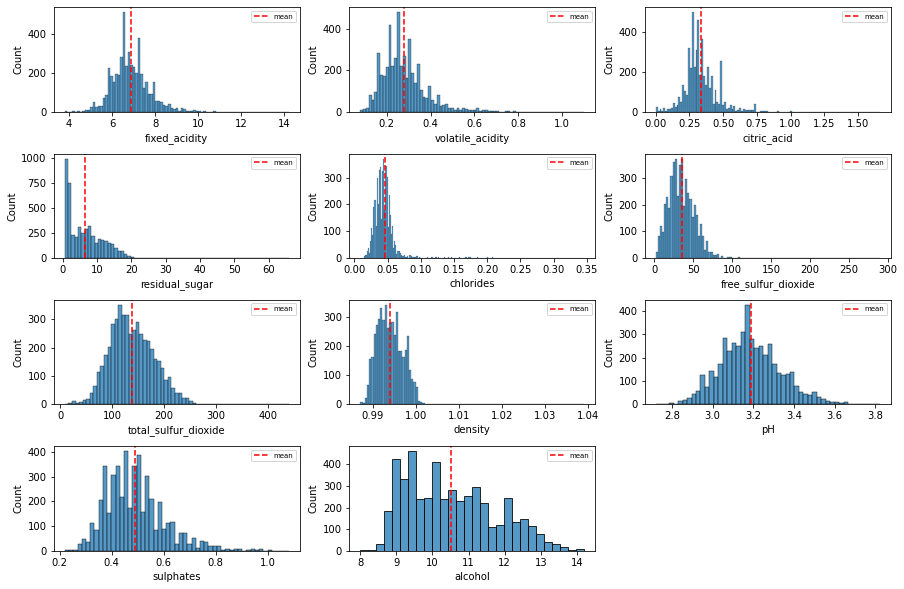

In [29]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
for i in range(4):
    for j in range(3):
        if 3*i+j == 11:
            break
        col = white_wine_data.columns[3*i+j]
        sns.histplot(white_wine_data[col], ax=ax[i,j])
        ax[i,j].axvline(x=(white_wine_data[col]).mean(), color='red', ls='--', label='mean')
        ax[i,j].legend(fontsize=7)
ax[3,2].remove()
plt.subplots_adjust(wspace=0.2, hspace=0.4)

Here is the probability density distribution of all the input variables for different output label (quality). We are using the kernel density estimate (KDE) plot and notice that for some plot we have values in the y-axis greater than 1 but still having the area under any distribution curve to be 1.

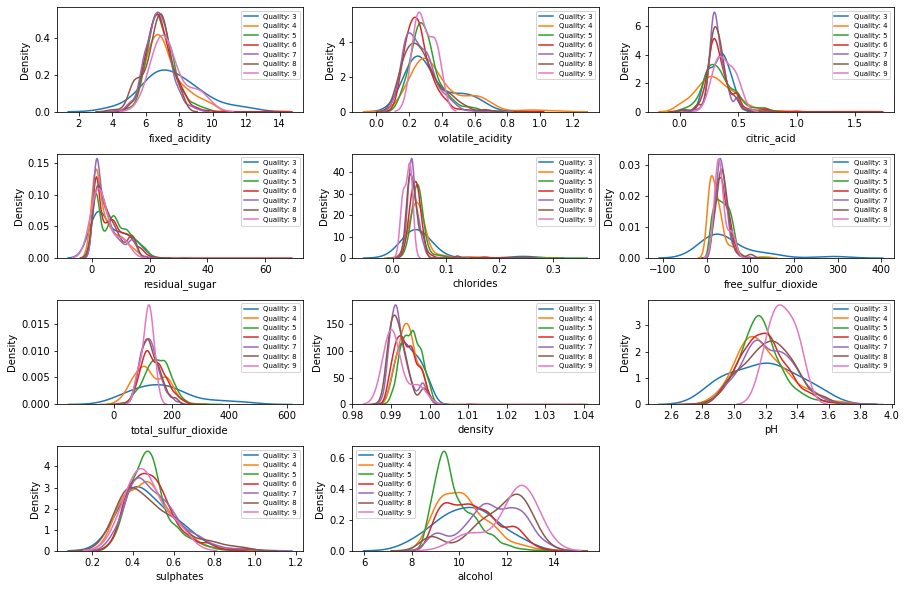

In [9]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
for i in range(4):
    for j in range(3):
        if 3*i+j == 11:
            break
        col = white_wine_data.columns[3*i+j]
        for k in range(3,10):
            sns.kdeplot(white_wine_data[col][white_wine_data['quality'] == k], ax=ax[i,j], label= 'Quality: {:}'.format(k))
            ax[i,j].legend(fontsize=7)
ax[3,2].remove()
plt.subplots_adjust(wspace=0.2, hspace=0.4)

Here are the correlations of each pair of the input variables. We are mostly concerned about the case when Quality is the dependent variable.

In [10]:
white_wine_data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


# Proposed Solution

Our primary goal is to predict the quality score of the wines in the test dataset which is essencially a multi-class classification problem with 7 classes corresponding to score 3 to 9. We propose the following algorithms to generate several models to find the best candidate solution.

### 1. K-Nearest Neighbor Classifier

This classifier compare a data point with the nearest k data points in the training set and assign the label of the majority to it. We choose this model as our baseline since it is the simplest and involves the least hyper-parameters.

### 2. Support Vector Machine/Classifier

This classifier finds the hyperplane that maximizes the separation of two classes using a decision boundary with margins. Since the native SVM only works for binary classification problem, we will use the "one vs rest" approach to use 7 SVM classifiers for each pair of one class and the rest. Another possible approach is "one vs one" where it is required to draw decision boundaries between each pair of two classies. Since "one vs rest" requires $k$ classifiers where k is the number of classes and "one vs one" requires $\frac{k(k-1)}{2}$ classifier, we only consider the former for efficiency.

### 3. Decision Tree Classifier

This classifier builds a tree model from a sequence of conditions and decisions in order to separate the data into classifiable portions. Each node in the tree will have the children so that the information gain is maximized. The leaf nodes will be purely assigned to only one label in our dataset.

### 4. Random Forest Classifier

This classifier takes advantage of the ensemble technique by building a set of decision trees and generate its predicted label according to the majority vote rule. Each decision tree is trained on a random subset of the whole training dataset, and a random subset of the features is chosen at each split with the size usually being the square root of the number of features (and should be 3 in our case). We hope this classifier can have more generalization rate compared with a singel decision tree.

### 5. Multi-layer Perceptron Classifier

This classifier employs non-linear activation functions to explore more features in the dataset. Besides, it has hidden layers to increase complexity. The technique of backpropogation is used to train the model and to minimize the loss function.

### 6. Benchmark

We will compare the performance of some our best-selected models with that of the models from the solution published on Kaggle by Jakub Zenon Kujawa <a name="benchmark"></a>[<sup>[4]</sup>](#Kujawa). 

After cross-validation and hyper-parameter tuning, his k-nearest neighbor classifier, decision tree classifier and random forest classifier attained an average accuracy of 87.52%, 88.56% and 90.67%, respectively. We aim to reach comparative accuracies for the our counterparts. Though he did not used a neural network model, we want to train such a model targeting an accuracy score of more than 90 percent.

# Evaluation Metrics

We will primarily use the $\bf{accuracy}$ or $\bf{averaged}$ $\bf{accuracy}$ accross validation sets to get an intuitive sense of percentage of the correctly predicted quality score of wines in the test set. We will also use $\bf{precision}$ (all true positive divides by all predicted positives) to see what our test performance will be if we weighs more on lowering our false positive rate or $\bf{recall}$ (all true positive divides by false negatives and true positives) to see what our test performance will be if we weighs more on lowering our false negative rate. In the former case, we may want to avoid misclassifying a good wine and in the later case, we may want avoid being too confident to predict the correct quality score of a wine. Also, we want to check the balance metric of both precision and recall, $\bf{f1}$ $\bf{score}$, of our models.Because we are doing multi-class classification, we will use one vs rest confusion matrix and calculate an average mearsure of these metrics. In addition, we want to use the $\bf{ROC}$-$\bf{AUC}$ score because it evaluates the performance of a model by taking into account the trade-off between false positives and false negatives.

# Model Selection

Our general procedure is to choose different base models and do hyper-parameter tuning in grid search. The grid search is based on a $5\times 5$ repeated k-fold cross-validation and using accuracy as the metrics to choose the best model.

### Initiate settings

In [39]:
# Get input features and output labels
X, y = white_wine_data.drop(columns='quality'), white_wine_data['quality']

# Shuffle the raw data
X, y = shuffle(X, y, random_state=0)

# Generate training, and test dataset by using a ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# preprocssor pipeline
scaler = StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
preprocessor = Pipeline([("scaler", scaler), ("imputer", imp)])
preprocessor.fit_transform(X_train, y_train)

# specify the 5 * 5 repeated k-fold cross-validation type
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42) 

# metrics used in cross-validation
metrics = ['accuracy']

### K-Nearest Neighbor Classifier

In [42]:
# Baisc model
knn = KNeighborsClassifier()

# hyper-parameters
params_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 10, 20, 50], 
    'weights': ['uniform', 'distance'], 
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2, 3]
}

# Set up a grid search model
clf_knn = GridSearchCV(estimator=knn, cv=rkf, param_grid=params_knn, scoring=metrics, refit='accuracy', verbose=0)

# training and testing
clf_knn.fit(X_train, y_train)
acc_knn = clf_knn.score(X_test, y_test)

In [59]:
print('Test accuracy: {:.2f}%.'.format(acc_knn * 100))
print("Best model parameters: ", clf_knn.best_params_)

Test accuracy: 61.84%.
Best model parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 50, 'p': 1, 'weights': 'distance'}


In [62]:
# Show the best five models with parameters
data_knn = pd.DataFrame(clf_knn.cv_results_)
data_knn_ = data_knn[['params', 'mean_test_accuracy', 'rank_test_accuracy']].sort_values('rank_test_accuracy')
pd.set_option('display.max_colwidth', None)
data_knn_[:5]

,params,mean_test_accuracy,rank_test_accuracy
139,"{'algorithm': 'brute', 'n_neighbors': 50, 'p': 1, 'weights': 'distance'}",0.601835,1
43,"{'algorithm': 'ball_tree', 'n_neighbors': 50, 'p': 1, 'weights': 'distance'}",0.601835,1
91,"{'algorithm': 'kd_tree', 'n_neighbors': 50, 'p': 1, 'weights': 'distance'}",0.601835,1
133,"{'algorithm': 'brute', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}",0.594333,4
37,"{'algorithm': 'ball_tree', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}",0.594333,4


### Support Vector Machine Classifier

In [44]:
# Baisc model
svc = SVC(decision_function_shape='ovr') # one vs rest

# hyper-parameters
params_svc = {
    'C': [0.01, 0.1, 1.0, 10], 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Set up a grid search model
clf_svc = GridSearchCV(estimator=svc, cv=rkf, param_grid=params_svc, scoring=metrics, refit='accuracy', verbose=0)

# training and testing
clf_svc.fit(X_train, y_train)
acc_svc = clf_svc.score(X_test, y_test)

In [60]:
print('Test accuracy: {:.2f}%.'.format(acc_svc * 100))
print("Best model parameters: ", clf_svc.best_params_)

Test accuracy: 53.88%.
Best model parameters:  {'C': 10, 'kernel': 'linear'}


In [63]:
# Show the best five models with parameters
data_svc = pd.DataFrame(clf_svc.cv_results_)
data_svc_ = data_svc[['params', 'mean_test_accuracy', 'rank_test_accuracy']].sort_values('rank_test_accuracy')
pd.set_option('display.max_colwidth', None)
data_svc_[:5]

,params,mean_test_accuracy,rank_test_accuracy
12,"{'C': 10, 'kernel': 'linear'}",0.518785,1
8,"{'C': 1.0, 'kernel': 'linear'}",0.518019,2
4,"{'C': 0.1, 'kernel': 'linear'}",0.514702,3
0,"{'C': 0.01, 'kernel': 'linear'}",0.496683,4
13,"{'C': 10, 'kernel': 'rbf'}",0.453903,5


### Decision Tree Classifier

In [ ]:
# Baisc model
dt = DecisionTreeClassifier()

# hyper-parameters
params_dt = {
    'criterion': ['gini', 'entropy', 'log-loss'],
    'splitter': ['best', 'random'], 
    'min_sample_split': [2, 3, 4],
}

# Set up a grid search model
clf_dt = GridSearchCV(estimator=dt, cv=rkf, param_grid=params_dt, scoring=metrics, refit='accuracy', verbose=0)

# training and testing
clf_dt.fit(X_train, y_train)
acc_dt = clf_dt.score(X_test, y_test)

In [ ]:
print('Accuracy: {:.2f}%.'.format(acc_dt * 100))
print("Best model parameters: ", clf_dt.best_params_)

### Random Forest Classifier

In [15]:
# Baisc model
rf = RandomForestClassifier()

# hyper-parameters
params_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy', 'log-loss'],
    'min_sample_split': [2, 3, 4],
}

# Set up a grid search model
clf_rf = GridSearchCV(estimator=rf, cv=rkf, param_grid=params_rf, scoring=metrics, refit='accuracy', verbose=0)

# training and testing
clf_rf.fit(X_train, y_train)
acc_rf = clf_rf.score(X_test, y_test)

Accuracy: 66.53%.


In [ ]:
print('Accuracy: {:.2f}%.'.format(acc_rf * 100))
print("Best model parameters: ", clf_rf.best_params_)

### Multi-layer Perceptron Classifier

In [ ]:
# Baisc model
mlp = MLPClassifier()

# hyper-parameters
params_mlp = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Set up a grid search model
clf_mlp = GridSearchCV(estimator=mlp, cv=rkf, param_grid=params_mlp, scoring=metrics, refit='accuracy', verbose=0)

# training and testing
clf_mlp.fit(X_train, y_train)
acc_mlp = clf_mlp.score(X_test, y_test)

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

Our data does not include any privacy infomation since the wines have no brand or company name attached, nor does it cause ethnic problem for all the scores are recored anonymously. However, the dataset was collected at 2009, and the wines nowadays might differ from those about 10 years ago. 

Nevertheless, we traced the data first from Kaggle, where it have been made public for years. Though wine tastes vary from person to person, we are not setting a standard but suggesting a model that can serve as a guidance of choosing good wines.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes

<a name="wine_trend"></a>1.[^](#Liz): Thach M. W., Liz (2022, Oct 12). U.S. wine market sales up 16.8% in 2021, pointing towards hot wine trends in 2022. Forbes. Retrieved February 22, 2023, from https://www.forbes.com/sites/lizthach/2022/04/25/us-wine-market-sales-up-168-in-2021-pointing-towards-hot-wine-trends-in-2022/amp/<br>

<a name="chemical"></a>2.[^](#Han): Seongju Han, Jiyun Yang, Kapseong Choi, Juyoung Kim, Koushik Adhikari, and Jeehyun Lee (2022, Feb 20). Chemical Analysis of Commercial White Wines and Its Relationship with Consumer Acceptability. Retrieved March 08 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8871119/<br>

<a name="fraud_wine"></a>3.[^](#Lana): Bortolot, Lana (2021, Aug 19). Beyond high-profile scandals, wine fraud is rampant. SevenFifty Daily. Retrieved February 22, 2023, from https://daily.sevenfifty.com/beyond-high-profile-scandals-wine-fraud-is-rampant/<br> 

<a name="benchmark"></a>4.[^](#Kujawa): Jakub Zenon Kujawa (2023, Feb 02). Wine Quality Prediction. Retrieved March 08, 2023, from https://www.kaggle.com/code/jakubzenonkujawa/wine-quality-prediction